### Import libraries

In [411]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [412]:
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [413]:
data_train = pd.read_excel('Data_Train.xlsx')
data_test = pd.read_excel('Test_set.xlsx')
data_submission = pd.read_excel('Sample_submission.xlsx')

In [414]:
data_train.shape

(10683, 11)

In [415]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [416]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [417]:
data_submission.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


### EDA

In [418]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [419]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [420]:
data_train.describe(include = object).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


#### Inferences:
- There is one record missing in routes and total stops.
- Out of 12 unique airlines Jet airways is more frequent.
- For most of the airlines source is delhi and destination is cochin.
- Most frequent route is del -> Bom -> Cok
- Most of the flights have 1 stop.

In [421]:
# Visualization

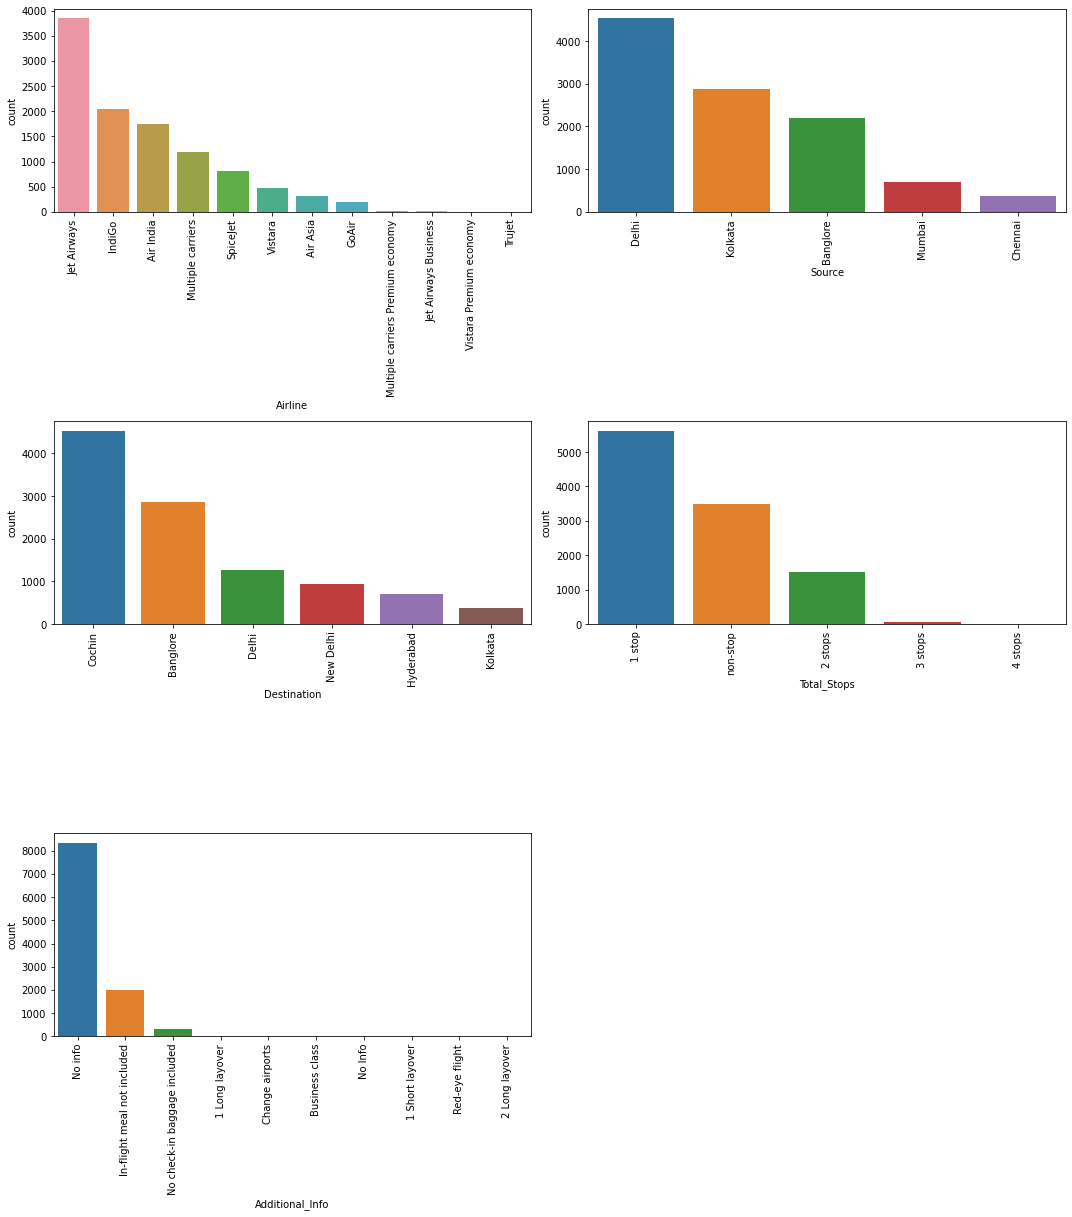

In [422]:
t=1
plt.figure(figsize=(15,17))
for i in ['Airline','Source','Destination','Total_Stops','Additional_Info']:
    plt.subplot(3,2,t)
    sns.countplot(x=data_train[i],order=data_train[i].value_counts().index)
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

#### Key observations
- There is duplicate category in destination delhi and new delhi.
- There is duplicate category in Additional_info No info and No Info.

- Jet airways have most number of flights.
- Mostly flight departures are from Delhi.
- Most flight arrivals are for Cochin.
- Most flights have either with only 1 stop or no stop.

In [423]:
# let's explore routes
data_train['Route'].value_counts().head(5)

DEL → BOM → COK    2376
BLR → DEL          1552
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
Name: Route, dtype: int64

In [424]:
# These 5 routes covers 58% of total flight routes
data_train['Route'].value_counts().head(5).sum()/data_train.shape[0]

0.5852288682954226

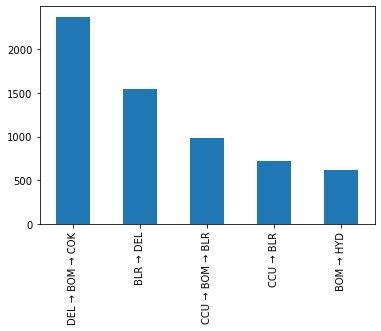

In [425]:
# Visualize the top 5 routes
data_train['Route'].value_counts().head(5).plot(kind='bar')
plt.show()

<AxesSubplot:>

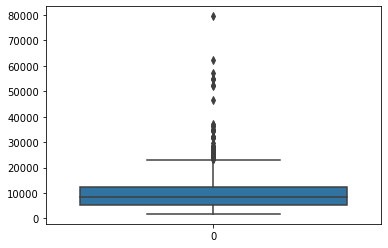

In [426]:
# Let'explore price column list.(for outliers detection)
sns.boxplot(data_train['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

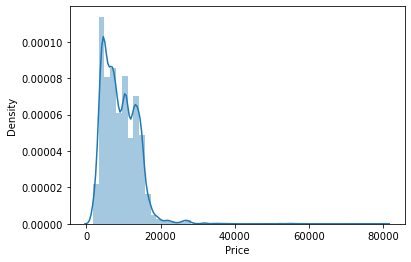

In [427]:
# Let'explore price column list.(distribution and skewness)
sns.distplot(data_train['Price'])

### Bivariate Analysis

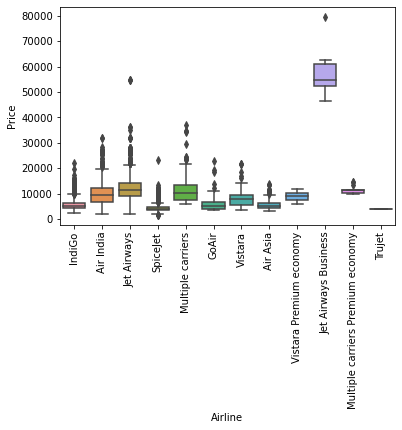

In [428]:
# Let's explore effect of airline on price

sns.boxplot(x=data_train['Airline'],y=data_train['Price'])
plt.xticks(rotation=90)
plt.show()

In [429]:
# Airline vs price (Anova, Kruskal-Wallis)

In [430]:
from scipy.stats import shapiro,jarque_bera,kruskal

In [431]:
# Asssumption 1 : The 

# H0 : The data is normal
# Ha : The data is not normal
shapiro(data_train['Price'])

ShapiroResult(statistic=0.8955879270329227, pvalue=1.5116289695144164e-64)

In [432]:
# Asssumption 1 : The 

# H0 : The data is normal
# Ha : The data is not normal
jarque_bera(data_train['Price'])

SignificanceResult(statistic=84545.14317610116, pvalue=0.0)

In [433]:
# The data is not normal

In [434]:
data_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [435]:
# We have to go with non-parametric test Krushal walls
# H0 : Airline has no effect on price
# Ha : Airline has effect on price
li=[]
for i in data_train['Airline'].unique():
    s = data_train[data_train['Airline']==i]['Price']
    li.append(s)
print(kruskal(li[0],li[1],li[2],li[3],li[4],li[5],li[6],li[7],li[8],li[9],li[10],li[11]))

KruskalResult(statistic=4870.593769019019, pvalue=0.0)


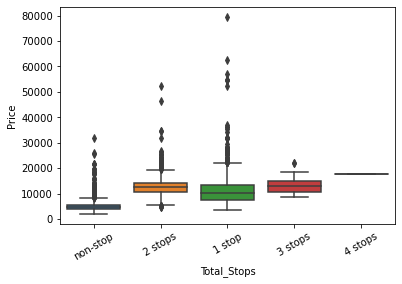

In [436]:
# Let's explore effect of total_stopson price
sns.boxplot(x=data_train['Total_Stops'],y=data_train['Price'])
plt.xticks(rotation = 30)
plt.show()

In [437]:
# Let's prove this statisticaly

In [438]:
sample = []
for i in ['non-stop', '2 stops', '1 stop', '3 stops']:
    s = data_train[data_train['Total_Stops']==i]['Price']
    sample.append(s)

In [439]:
kruskal(sample[0],sample[1],sample[2],sample[3])

KruskalResult(statistic=5749.236822864575, pvalue=0.0)

#### Inference :
1. Flight price is affected by Airline and Total Stops.

### Data Preprocessing

In [440]:
# Combine the dataset
data = pd.concat([data_train,data_test],axis =0)

In [441]:
data.shape

(13354, 11)

In [442]:
# Check for null values
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [443]:
data[data.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [444]:
# Drop the row with null values
data.drop(index=[9039],inplace = True)

In [445]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [446]:
# treat the outliers

# there are outliers in price but we decide to keep it in the data as it seems to be genuine

### Feature Engineering

* Generate some new feature using existing ones.
* Encoding category columns.

### Airline

In [447]:
map_Airline = data_train['Airline'].value_counts(normalize=True).to_dict()

In [448]:
data['Airline'] = data['Airline'].map(map_Airline)

In [449]:
data['Airline'].value_counts()

0.360292    4746
0.192174    2564
0.163999    2191
0.111954    1543
0.076570    1026
0.044838     608
0.029861     405
0.018160     240
0.001217      16
0.000562       8
0.000281       5
0.000094       1
Name: Airline, dtype: int64

In [450]:
### date of journey

In [451]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],format = '%d/%m/%Y')

In [452]:
data['Day_of_journey'] = data['Date_of_Journey'].dt.day
data['Month_of_journey'] = data['Date_of_Journey'].dt.month
data['Weekday_of_journey'] = data['Date_of_Journey'].dt.weekday

In [453]:
data.drop(columns='Date_of_Journey',inplace=True)

In [454]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Weekday_of_journey
0,0.192174,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,0.163999,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2


### Source and destination

In [455]:
data['Source'].value_counts()

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [456]:
data['Destination'].value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [457]:
data['Destination'] = data['Destination'].replace('New Delhi','Delhi')

In [458]:
data['Source_to_Destination'] = data['Source'] + '-' +data['Destination']

In [459]:
map_sd = data[data['Price'].notnull()]['Source_to_Destination'].value_counts(normalize=True).to_dict()

In [460]:
data['Source_to_Destination'] = data['Source_to_Destination'].map(map_sd)

In [461]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Weekday_of_journey,Source_to_Destination
0,0.192174,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


In [462]:
data.drop(columns=['Source','Destination'],inplace=True)

In [463]:
data.head(2)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Weekday_of_journey,Source_to_Destination
0,0.192174,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770


### Route

In [464]:
busy_routes = data_train['Route'].value_counts().head(5).index

In [465]:
busy_routes

Index(['DEL → BOM → COK', 'BLR → DEL', 'CCU → BOM → BLR', 'CCU → BLR',
       'BOM → HYD'],
      dtype='object')

In [466]:
data['Route'] = data['Route'].apply(lambda r: 1 if r in busy_routes else 0)

In [467]:
data.head(2)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Weekday_of_journey,Source_to_Destination
0,0.192174,1,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770


### Dep_time and Arrival Time

4AM to 8AM -> Early Morning -> 0
8AM to 12PM -> Morning -> 1
12PM to 4PM -> Afternoon -> 2
4PM to 8PM -> Evening -> 3
8PM to 12Am -> Night -> 4
12AM to 4AM -> Late Night -> 5

In [468]:
data['Dep_Time']=data['Dep_Time'].str.split(':',expand=True)[0].astype(int)

In [469]:
data['Arrival_Time'] = data['Arrival_Time'].str.split(':',expand=True)[0].astype(int)

In [470]:
data.head(2)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Weekday_of_journey,Source_to_Destination
0,0.192174,1,22,1,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,5,13,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770


In [471]:
def hour_to_cat(h):
    if h<=4:
        return 5
    elif h<=8:
        return 0
    elif h<=12:
        return 1
    elif h<=16:
        return 2
    elif h<=20:
        return 3
    elif h<=24:
        return 4

In [472]:
data['Dep_Time'] = data['Dep_Time'].apply(hour_to_cat)
data['Arrival_Time'] = data['Arrival_Time'].apply(hour_to_cat)

In [473]:
data.head(2)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Weekday_of_journey,Source_to_Destination
0,0.192174,1,4,5,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770


### Duration

In [474]:
data[['Dur_h','Dur_m']] = data['Duration'].str.split(expand=True)

In [475]:
data[data['Duration']=='5m']

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Weekday_of_journey,Source_to_Destination,Dur_h,Dur_m
6474,0.163999,0,2,2,5m,2 stops,No info,17327.0,6,3,2,0.06525,5m,None
2660,0.163999,0,2,2,5m,2 stops,No info,NaN,12,3,1,0.06525,5m,None


In [476]:
data['Dur_h'] = data['Dur_h'].str.rstrip('hm').astype(int) ## Cause there were two column with 5m in hour column created by duration indicating flight duration to be 5m.

In [477]:
data['Dur_m'].fillna('0',inplace=True)

In [478]:
data['Dur_m'] = data['Dur_m'].str.rstrip('m').astype(int)

In [479]:
data['Duration']=data['Dur_h']*60+data['Dur_m']

In [480]:
data.drop(columns=['Dur_h','Dur_m'],inplace=True)

In [481]:
data.head(2)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Weekday_of_journey,Source_to_Destination
0,0.192174,1,4,5,170,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,445,2 stops,No info,7662.0,1,5,2,0.268770


### Total stops

In [482]:
data['Total_Stops'] = data['Total_Stops'].str.split(expand=True)[0]

In [483]:
data['Total_Stops'] = np.where(data['Total_Stops']=='non-stop','0',data['Total_Stops'])

In [484]:
data['Total_Stops']= data['Total_Stops'].astype(int)

In [485]:
data['Total_Stops'].value_counts()

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

### Additional info

In [486]:
data['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [487]:
data['Additional_Info'] = data['Additional_Info'].apply(lambda r : 0 if r in ['No info','No Info'] else 1)

### Train test split

In [488]:
train_set = data[data['Price'].notnull()]
test_set = data[data['Price'].isnull()]

In [489]:
test_set.drop(columns='Price',inplace =True)

In [490]:
# Train test split on train_set

In [491]:
from sklearn.model_selection import train_test_split

In [492]:
y = train_set['Price']
x = train_set.drop(columns='Price')

In [493]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [494]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8545, 11) (2137, 11) (8545,) (2137,)


### Predictive Modeling

In [495]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  VotingRegressor,StackingRegressor

from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

In [496]:
def hack_eval(y_true,y_pred):
    scor = 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
    return scor

In [497]:
r2 = []
ms_error = []
rms_error = []
map_error = []
fit_model = []
hack_score = []

def model_evaluation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    
    print('R2',r2_score(ytest,pred))
    print('MSE',mean_squared_error(ytest,pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,pred)))
    print('MAPE',mean_absolute_percentage_error(ytest,pred))
    print('Hack Score' , hack_eval(ytest,pred))
    
    inp = input('Do you want to save the model?')
    
    if inp.lower()=='y':
        fit_model.append(str(m))
        r2.append(r2_score(ytest,pred))
        ms_error.append(mean_squared_error(ytest,pred))
        rms_error.append(np.sqrt(mean_squared_error(ytest,pred)))
        map_error.append(mean_absolute_percentage_error(ytest,pred))
        hack_score.append(hack_eval(ytest,pred))
        
        global score_card 
        score_card = pd.DataFrame({'Model':fit_model,
                                  'R2':r2,
                                  'MSE':ms_error,
                                  'RMSE':rms_error,
                                  'MAPE':map_error,
                                  'Hackathon score':hack_score})

### Linear Regression

In [498]:
model_evaluation(LinearRegression(),x_train,y_train,x_test,y_test)

R2 0.49605673287692054
MSE 11209267.615819253
RMSE 3348.0244347703397
MAPE 0.2717233415748326
Hack Score 0.852277584821571
Do you want to save the model?y


### Ridge and Lasso

In [499]:
model_evaluation(Ridge(alpha=1),x_train,y_train,x_test,y_test)

TypeError: solve() got an unexpected keyword argument 'sym_pos'

In [500]:
model_evaluation(Lasso(alpha=1),x_train,y_train,x_test,y_test)

R2 0.49608915179655044
MSE 11208546.518089302
RMSE 3347.9167430044167
MAPE 0.27164738612046074
Hack Score 0.839421780495631
Do you want to save the model?y


In [501]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422


### Decision tree

In [503]:
model_evaluation(DecisionTreeRegressor(max_depth=9),x_train,y_train,x_test,y_test)

R2 0.7850691599649777
MSE 4780731.209287085
RMSE 2186.488328184508
MAPE 0.12754084584609346
Hack Score 0.9181240225921614
Do you want to save the model?y


In [504]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
2,DecisionTreeRegressor(max_depth=5),0.618895,8.476972e+06,2911.524036,0.204219,0.886502
3,DecisionTreeRegressor(max_depth=9),0.785069,4.780731e+06,2186.488328,0.127541,0.918124


### Random forest

In [508]:
model_evaluation(RandomForestRegressor(max_depth=10),x_train,y_train,x_test,y_test)

R2 0.8446122577869775
MSE 3456307.287578669
RMSE 1859.1146515421444
MAPE 0.09972395584554687
Hack Score 0.9337566972576655
Do you want to save the model?y


In [509]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
2,DecisionTreeRegressor(max_depth=5),0.618895,8.476972e+06,2911.524036,0.204219,0.886502
3,DecisionTreeRegressor(max_depth=9),0.785069,4.780731e+06,2186.488328,0.127541,0.918124
4,RandomForestRegressor(max_depth=5),0.676602,7.193388e+06,2682.049236,0.188221,0.894819
5,RandomForestRegressor(max_depth=9),0.834130,3.689459e+06,1920.796541,0.108818,0.930527
6,RandomForestRegressor(max_depth=10),0.844612,3.456307e+06,1859.114652,0.099724,0.933757


### AdaBoost

In [512]:
model_evaluation(AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=3),n_estimators=200),x_train,y_train,x_test,y_test)

R2 0.4611102486802632
MSE 11986586.25295199
RMSE 3462.164966166689
MAPE 0.37338340894516386
Hack Score 0.833523071254179
Do you want to save the model?y


### Gradient boosting

In [513]:
model_evaluation(GradientBoostingRegressor(max_depth=7,n_estimators=150),x_train,y_train,x_test,y_test)

R2 0.8832574499865964
MSE 2596717.866127978
RMSE 1611.433481757152
MAPE 0.08936497063184387
Hack Score 0.9409093777897557
Do you want to save the model?y


In [514]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
2,DecisionTreeRegressor(max_depth=5),0.618895,8.476972e+06,2911.524036,0.204219,0.886502
3,DecisionTreeRegressor(max_depth=9),0.785069,4.780731e+06,2186.488328,0.127541,0.918124
4,RandomForestRegressor(max_depth=5),0.676602,7.193388e+06,2682.049236,0.188221,0.894819
5,RandomForestRegressor(max_depth=9),0.834130,3.689459e+06,1920.796541,0.108818,0.930527
6,RandomForestRegressor(max_depth=10),0.844612,3.456307e+06,1859.114652,0.099724,0.933757
7,AdaBoostRegressor(base_estimator=RandomForestR...,0.461110,1.198659e+07,3462.164966,0.373383,0.833523
8,"GradientBoostingRegressor(max_depth=7, n_estim...",0.883257,2.596718e+06,1611.433482,0.089365,0.940909


### Xg boost

In [515]:
model_evaluation(XGBRegressor(n_estimators=130,max_depth=8),x_train,y_train,x_test,y_test)

R2 0.8910308912801614
MSE 2423812.324095705
RMSE 1556.8597637859696
MAPE 0.08060207998321352
Hack Score 0.9426880897140467
Do you want to save the model?y


In [516]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
2,DecisionTreeRegressor(max_depth=5),0.618895,8.476972e+06,2911.524036,0.204219,0.886502
3,DecisionTreeRegressor(max_depth=9),0.785069,4.780731e+06,2186.488328,0.127541,0.918124
4,RandomForestRegressor(max_depth=5),0.676602,7.193388e+06,2682.049236,0.188221,0.894819
5,RandomForestRegressor(max_depth=9),0.834130,3.689459e+06,1920.796541,0.108818,0.930527
6,RandomForestRegressor(max_depth=10),0.844612,3.456307e+06,1859.114652,0.099724,0.933757
7,AdaBoostRegressor(base_estimator=RandomForestR...,0.461110,1.198659e+07,3462.164966,0.373383,0.833523
8,"GradientBoostingRegressor(max_depth=7, n_estim...",0.883257,2.596718e+06,1611.433482,0.089365,0.940909
9,"XGBRegressor(base_score=None, booster=None, ca...",0.891031,2.423812e+06,1556.859764,0.080602,0.942688


### Voting

In [518]:
base_models = [('Dt',DecisionTreeRegressor(max_depth=10)),
              ('RF',RandomForestRegressor(n_estimators=150,max_depth=9)),
              ('GBR',GradientBoostingRegressor(max_depth=7,n_estimators=130)),
              ('XGBR',XGBRegressor(max_depth=8,n_estimators=130))]

In [519]:
model_evaluation(VotingRegressor(base_models),x_train,y_train,x_test,y_test)

R2 0.8692048999978378
MSE 2909290.339628654
RMSE 1705.6641931015185
MAPE 0.09157747318889688
Hack Score 0.9388092296740799
Do you want to save the model?y


### Stacking

In [520]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
2,DecisionTreeRegressor(max_depth=5),0.618895,8.476972e+06,2911.524036,0.204219,0.886502
3,DecisionTreeRegressor(max_depth=9),0.785069,4.780731e+06,2186.488328,0.127541,0.918124
4,RandomForestRegressor(max_depth=5),0.676602,7.193388e+06,2682.049236,0.188221,0.894819
5,RandomForestRegressor(max_depth=9),0.834130,3.689459e+06,1920.796541,0.108818,0.930527
6,RandomForestRegressor(max_depth=10),0.844612,3.456307e+06,1859.114652,0.099724,0.933757
7,AdaBoostRegressor(base_estimator=RandomForestR...,0.461110,1.198659e+07,3462.164966,0.373383,0.833523
8,"GradientBoostingRegressor(max_depth=7, n_estim...",0.883257,2.596718e+06,1611.433482,0.089365,0.940909
9,"XGBRegressor(base_score=None, booster=None, ca...",0.891031,2.423812e+06,1556.859764,0.080602,0.942688


In [523]:
base_models = [('Dt',DecisionTreeRegressor(max_depth=10)),
               ('DT2',DecisionTreeRegressor(max_depth=9)),
               ('RF2',RandomForestRegressor(n_estimators=150,max_depth=8)),
              ('RF',RandomForestRegressor(n_estimators=130,max_depth=9)),
              ('GBR',GradientBoostingRegressor(max_depth=9,n_estimators=130)),
              ('XGBR',XGBRegressor(max_depth=8,n_estimators=130))]

In [524]:
model_evaluation(StackingRegressor(estimators=base_models),x_train,y_train,x_test,y_test)

R2 0.8887538111078639
MSE 2474461.6782971686
RMSE 1573.0421730828352
MAPE 0.08004439992479633
Hack Score 0.9435859594487233
Do you want to save the model?y


In [525]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
2,DecisionTreeRegressor(max_depth=5),0.618895,8.476972e+06,2911.524036,0.204219,0.886502
3,DecisionTreeRegressor(max_depth=9),0.785069,4.780731e+06,2186.488328,0.127541,0.918124
4,RandomForestRegressor(max_depth=5),0.676602,7.193388e+06,2682.049236,0.188221,0.894819
5,RandomForestRegressor(max_depth=9),0.834130,3.689459e+06,1920.796541,0.108818,0.930527
6,RandomForestRegressor(max_depth=10),0.844612,3.456307e+06,1859.114652,0.099724,0.933757
7,AdaBoostRegressor(base_estimator=RandomForestR...,0.461110,1.198659e+07,3462.164966,0.373383,0.833523
8,"GradientBoostingRegressor(max_depth=7, n_estim...",0.883257,2.596718e+06,1611.433482,0.089365,0.940909
9,"XGBRegressor(base_score=None, booster=None, ca...",0.891031,2.423812e+06,1556.859764,0.080602,0.942688


### Let's tune XGBRegressor

In [526]:
param = {'n_estimators':[100,200,130,150,170,180,200],
        'max_depth':[8,9,10,11,12],
        'gamma':[0,1,2]}

In [527]:
from sklearn.model_selection import GridSearchCV

In [529]:
gscv = GridSearchCV(estimator=XGBRegressor(),
                   param_grid=param,
                   scoring='r2',
                   verbose=3,
                   cv=5)

In [530]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.892 total time=   0.3s
[CV 2/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.894 total time=   0.3s
[CV 3/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.904 total time=   0.3s
[CV 4/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.854 total time=   0.2s
[CV 5/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.908 total time=   0.2s
[CV 1/5] END gamma=0, max_depth=8, n_estimators=200;, score=0.890 total time=   0.5s
[CV 2/5] END gamma=0, max_depth=8, n_estimators=200;, score=0.891 total time=   0.5s
[CV 3/5] END gamma=0, max_depth=8, n_estimators=200;, score=0.901 total time=   0.5s
[CV 4/5] END gamma=0, max_depth=8, n_estimators=200;, score=0.852 total time=   0.5s
[CV 5/5] END gamma=0, max_depth=8, n_estimators=200;, score=0.907 total time=   0.5s
[CV 1/5] END gamma=0, max_depth=8, n_estimators=130;, score=0.892 total time=   0.3s
[C

[CV 2/5] END gamma=0, max_depth=10, n_estimators=180;, score=0.886 total time=   0.6s
[CV 3/5] END gamma=0, max_depth=10, n_estimators=180;, score=0.896 total time=   0.7s
[CV 4/5] END gamma=0, max_depth=10, n_estimators=180;, score=0.853 total time=   0.6s
[CV 5/5] END gamma=0, max_depth=10, n_estimators=180;, score=0.905 total time=   0.7s
[CV 1/5] END gamma=0, max_depth=10, n_estimators=200;, score=0.888 total time=   0.6s
[CV 2/5] END gamma=0, max_depth=10, n_estimators=200;, score=0.886 total time=   0.7s
[CV 3/5] END gamma=0, max_depth=10, n_estimators=200;, score=0.896 total time=   0.8s
[CV 4/5] END gamma=0, max_depth=10, n_estimators=200;, score=0.853 total time=   0.6s
[CV 5/5] END gamma=0, max_depth=10, n_estimators=200;, score=0.904 total time=   0.7s
[CV 1/5] END gamma=0, max_depth=11, n_estimators=100;, score=0.887 total time=   0.3s
[CV 2/5] END gamma=0, max_depth=11, n_estimators=100;, score=0.893 total time=   0.3s
[CV 3/5] END gamma=0, max_depth=11, n_estimators=100;,

[CV 3/5] END gamma=1, max_depth=8, n_estimators=150;, score=0.903 total time=   0.3s
[CV 4/5] END gamma=1, max_depth=8, n_estimators=150;, score=0.853 total time=   0.3s
[CV 5/5] END gamma=1, max_depth=8, n_estimators=150;, score=0.908 total time=   0.3s
[CV 1/5] END gamma=1, max_depth=8, n_estimators=170;, score=0.891 total time=   0.3s
[CV 2/5] END gamma=1, max_depth=8, n_estimators=170;, score=0.892 total time=   0.3s
[CV 3/5] END gamma=1, max_depth=8, n_estimators=170;, score=0.902 total time=   0.3s
[CV 4/5] END gamma=1, max_depth=8, n_estimators=170;, score=0.853 total time=   0.3s
[CV 5/5] END gamma=1, max_depth=8, n_estimators=170;, score=0.907 total time=   0.3s
[CV 1/5] END gamma=1, max_depth=8, n_estimators=180;, score=0.891 total time=   0.3s
[CV 2/5] END gamma=1, max_depth=8, n_estimators=180;, score=0.891 total time=   0.3s
[CV 3/5] END gamma=1, max_depth=8, n_estimators=180;, score=0.902 total time=   0.3s
[CV 4/5] END gamma=1, max_depth=8, n_estimators=180;, score=0.852

[CV 4/5] END gamma=1, max_depth=11, n_estimators=200;, score=0.850 total time=   0.7s
[CV 5/5] END gamma=1, max_depth=11, n_estimators=200;, score=0.903 total time=   0.7s
[CV 1/5] END gamma=1, max_depth=11, n_estimators=130;, score=0.887 total time=   0.4s
[CV 2/5] END gamma=1, max_depth=11, n_estimators=130;, score=0.893 total time=   0.5s
[CV 3/5] END gamma=1, max_depth=11, n_estimators=130;, score=0.890 total time=   0.4s
[CV 4/5] END gamma=1, max_depth=11, n_estimators=130;, score=0.850 total time=   0.5s
[CV 5/5] END gamma=1, max_depth=11, n_estimators=130;, score=0.903 total time=   0.5s
[CV 1/5] END gamma=1, max_depth=11, n_estimators=150;, score=0.886 total time=   0.5s
[CV 2/5] END gamma=1, max_depth=11, n_estimators=150;, score=0.893 total time=   0.7s
[CV 3/5] END gamma=1, max_depth=11, n_estimators=150;, score=0.889 total time=   0.6s
[CV 4/5] END gamma=1, max_depth=11, n_estimators=150;, score=0.850 total time=   0.6s
[CV 5/5] END gamma=1, max_depth=11, n_estimators=150;,

[CV 5/5] END gamma=2, max_depth=8, n_estimators=200;, score=0.907 total time=   0.5s
[CV 1/5] END gamma=2, max_depth=9, n_estimators=100;, score=0.894 total time=   0.2s
[CV 2/5] END gamma=2, max_depth=9, n_estimators=100;, score=0.892 total time=   0.2s
[CV 3/5] END gamma=2, max_depth=9, n_estimators=100;, score=0.902 total time=   0.2s
[CV 4/5] END gamma=2, max_depth=9, n_estimators=100;, score=0.862 total time=   0.2s
[CV 5/5] END gamma=2, max_depth=9, n_estimators=100;, score=0.896 total time=   0.3s
[CV 1/5] END gamma=2, max_depth=9, n_estimators=200;, score=0.891 total time=   0.5s
[CV 2/5] END gamma=2, max_depth=9, n_estimators=200;, score=0.890 total time=   0.5s
[CV 3/5] END gamma=2, max_depth=9, n_estimators=200;, score=0.899 total time=   0.5s
[CV 4/5] END gamma=2, max_depth=9, n_estimators=200;, score=0.861 total time=   0.5s
[CV 5/5] END gamma=2, max_depth=9, n_estimators=200;, score=0.894 total time=   0.5s
[CV 1/5] END gamma=2, max_depth=9, n_estimators=130;, score=0.893

[CV 1/5] END gamma=2, max_depth=11, n_estimators=180;, score=0.887 total time=   0.7s
[CV 2/5] END gamma=2, max_depth=11, n_estimators=180;, score=0.893 total time=   0.7s
[CV 3/5] END gamma=2, max_depth=11, n_estimators=180;, score=0.889 total time=   0.7s
[CV 4/5] END gamma=2, max_depth=11, n_estimators=180;, score=0.850 total time=   0.7s
[CV 5/5] END gamma=2, max_depth=11, n_estimators=180;, score=0.903 total time=   0.6s
[CV 1/5] END gamma=2, max_depth=11, n_estimators=200;, score=0.887 total time=   0.7s
[CV 2/5] END gamma=2, max_depth=11, n_estimators=200;, score=0.893 total time=   0.8s
[CV 3/5] END gamma=2, max_depth=11, n_estimators=200;, score=0.889 total time=   0.8s
[CV 4/5] END gamma=2, max_depth=11, n_estimators=200;, score=0.850 total time=   0.9s
[CV 5/5] END gamma=2, max_depth=11, n_estimators=200;, score=0.903 total time=   0.7s
[CV 1/5] END gamma=2, max_depth=12, n_estimators=100;, score=0.883 total time=   0.5s
[CV 2/5] END gamma=2, max_depth=12, n_estimators=100;,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [531]:
gscv.best_score_

0.8901974613052095

In [532]:
gscv.best_params_

{'gamma': 2, 'max_depth': 8, 'n_estimators': 100}

In [533]:
model_evaluation(XGBRegressor(n_estimators=100,max_depth=8,gamma=2),x_train,y_train,x_test,y_test)

R2 0.8917202203863678
MSE 2408479.4980993345
RMSE 1551.9276716713748
MAPE 0.08059081055490643
Hack Score 0.9432453423604535
Do you want to save the model?y


In [534]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
2,DecisionTreeRegressor(max_depth=5),0.618895,8.476972e+06,2911.524036,0.204219,0.886502
3,DecisionTreeRegressor(max_depth=9),0.785069,4.780731e+06,2186.488328,0.127541,0.918124
4,RandomForestRegressor(max_depth=5),0.676602,7.193388e+06,2682.049236,0.188221,0.894819
5,RandomForestRegressor(max_depth=9),0.834130,3.689459e+06,1920.796541,0.108818,0.930527
6,RandomForestRegressor(max_depth=10),0.844612,3.456307e+06,1859.114652,0.099724,0.933757
7,AdaBoostRegressor(base_estimator=RandomForestR...,0.461110,1.198659e+07,3462.164966,0.373383,0.833523
8,"GradientBoostingRegressor(max_depth=7, n_estim...",0.883257,2.596718e+06,1611.433482,0.089365,0.940909
9,"XGBRegressor(base_score=None, booster=None, ca...",0.891031,2.423812e+06,1556.859764,0.080602,0.942688


## Hackathon submission

In [536]:
data_submission

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [541]:
final_model = XGBRegressor(n_estimators=100,max_depth=8,gamma=2)

In [542]:
final_model.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [543]:
final_pred = final_model.predict(test_set)

In [544]:
final_pred

array([14109.626 ,  4194.5244, 13044.336 , ..., 16360.684 , 13996.449 ,
        8073.106 ], dtype=float32)

In [545]:
len(final_pred)

2671

In [551]:
final_submission = pd.DataFrame({'Price':final_pred})

In [552]:
final_submission.to_csv('final_submission.csv',index=False)